# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


必要なモジュールをインポートします。

*   pandas：表データの前処理・集計に便利な型「データフレーム」を提供してくれるライブラリ
*   sklearn：Scikit-learn。pythonで機械学習を実行するために便利なモジュールを集めてあるパッケージ。今回は以下のモジュールを使用する。
> *   model_selection：モデル構築を実施する際に便利なモジュールがいくつか用意されています。今回はtrain_test_split（データ分割をしてくれるメソッド）をインポートします。
> *   metrics：モデル検証を実施する際に便利なモジュールがいくつか用意されています。今回はaccuracy_score（正解率計算用モジュール）とconfusion_matrix（混合行列作成用モジュール）、roc_curve（ROC曲線作成用モジュール）、auc（AUC計算用モジュール）をインポートします。
*   lightgbm：LightGBMを実行するためのライブラリ
> *   LGBMClassifier：LightGBMを実施するためのモジュール
*   imblearn：不均衡データを分析するために使われるライブラリ
> *   under_sampling：アンダーサンプリングを実施するためのモジュール。RandomUnderSamplerというメソッドが実装されている。
*   matplotlib：pythonでグラフ描画に使われるライブラリ
*   seaborn：pythonでグラフ描画に使われるライブラリ（matplotlibより美しい）

※ 比較のため決定木用モジュールもインポートしておく

In [2]:
# pandas のインポート
import pandas as pd

# 機械学習用ライブラリ sklearn（scikit-learn）内にあるライブラリ  から
# モデル構築（訓練用）/検証データ分割用メソッド train_test_split をインポート
from sklearn.model_selection import train_test_split

# アンダーサンプリング用ライブラリをインポート
from imblearn.under_sampling import RandomUnderSampler

# LightGBM用ライブラリをインポート
from lightgbm import LGBMClassifier

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# グラフ描画用ライブラリ matplotlib、seaborn をインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# データの読み込み

In [3]:
# 買物データを読み込む
ECSiteShopping = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/ECsiteShopping.csv")
ECSiteShopping

,UserID,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2
0,U00001,0.0,0.0,0.0,0.379526,0.0,0.0,0.273581,0.0,0.0,0.000000,0.212785,0.0,0.134108,22370,0.0,0.0,0.0,0.245083,0.0,0.0,0.567593,0.0,0.000000,0.000000,0.093662,0.0,0.093662,32030
1,U00002,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000
2,U00003,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000
3,U00006,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000
4,U00007,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,U14515,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.717514,0.000000,0.0,0.282486,1770,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.697465,0.133521,0.000000,0.0,0.169014,17750
13304,U14516,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000
13305,U14517,0.0,0.0,0.0,0.000000,0.0,0.0,0.869110,0.0,0.0,0.000000,0.000000,0.0,0.130890,3820,0.0,0.0,0.0,0.095627,0.0,0.0,0.310428,0.0,0.037001,0.320519,0.092263,0.0,0.144161,20810
13306,U14518,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.655568,0.000000,0.0,0.344432,8710


In [4]:
# 上半期の購入総額についてデシルランクを付与
total_1_qt10 = ECSiteShopping["Total_1"].quantile(0.1)
total_1_qt20 = ECSiteShopping["Total_1"].quantile(0.2)
total_1_qt30 = ECSiteShopping["Total_1"].quantile(0.3)
total_1_qt40 = ECSiteShopping["Total_1"].quantile(0.4)
total_1_qt50 = ECSiteShopping["Total_1"].quantile(0.5)
total_1_qt60 = ECSiteShopping["Total_1"].quantile(0.6)
total_1_qt70 = ECSiteShopping["Total_1"].quantile(0.7)
total_1_qt80 = ECSiteShopping["Total_1"].quantile(0.8)
total_1_qt90 = ECSiteShopping["Total_1"].quantile(0.9)

def add_d_rank1(x,qt10,qt20,qt30,qt40,qt50,qt60,qt70,qt80,qt90):
  if x["Total_1"] > qt90:
    return 1
  elif x["Total_1"] > qt80:
    return 2
  elif x["Total_1"] > qt70:
    return 3
  elif x["Total_1"] > qt60:
    return 4
  elif x["Total_1"] > qt50:
    return 5
  elif x["Total_1"] > qt40:
    return 6
  elif x["Total_1"] > qt30:
    return 7
  elif x["Total_1"] > qt20:
    return 8
  elif x["Total_1"] > qt10:
    return 9
  else:
    return 10

ECSiteShopping["D_RANK_1"] = ECSiteShopping.apply( add_d_rank1, qt10=total_1_qt10, qt20=total_1_qt20, qt30=total_1_qt30, qt40=total_1_qt40, qt50=total_1_qt50, qt60=total_1_qt60, qt70=total_1_qt70, qt80=total_1_qt80, qt90=total_1_qt90, axis=1)

In [5]:
# 下半期の購入総額についてデシルランクを付与
total_2_qt10 = ECSiteShopping["Total_2"].quantile(0.1)
total_2_qt20 = ECSiteShopping["Total_2"].quantile(0.2)
total_2_qt30 = ECSiteShopping["Total_2"].quantile(0.3)
total_2_qt40 = ECSiteShopping["Total_2"].quantile(0.4)
total_2_qt50 = ECSiteShopping["Total_2"].quantile(0.5)
total_2_qt60 = ECSiteShopping["Total_2"].quantile(0.6)
total_2_qt70 = ECSiteShopping["Total_2"].quantile(0.7)
total_2_qt80 = ECSiteShopping["Total_2"].quantile(0.8)
total_2_qt90 = ECSiteShopping["Total_2"].quantile(0.9)

def add_d_rank2(x,qt10,qt20,qt30,qt40,qt50,qt60,qt70,qt80,qt90):
  if x["Total_2"] > qt90:
    return 1
  elif x["Total_2"] > qt80:
    return 2
  elif x["Total_2"] > qt70:
    return 3
  elif x["Total_2"] > qt60:
    return 4
  elif x["Total_2"] > qt50:
    return 5
  elif x["Total_2"] > qt40:
    return 6
  elif x["Total_2"] > qt30:
    return 7
  elif x["Total_2"] > qt20:
    return 8
  elif x["Total_2"] > qt10:
    return 9
  else:
    return 10

ECSiteShopping["D_RANK_2"] = ECSiteShopping.apply( add_d_rank2, qt10=total_2_qt10, qt20=total_2_qt20, qt30=total_2_qt30, qt40=total_2_qt40, qt50=total_2_qt50, qt60=total_2_qt60, qt70=total_2_qt70, qt80=total_2_qt80, qt90=total_2_qt90, axis=1)

In [6]:
# 成長顧客フラグを付与する（デシルランクが3つ以上上がった顧客）
def add_grow_customer(x):
  if x["D_RANK_2"] - x["D_RANK_1"] >= 3:
    return 1
  else:
    return 0

ECSiteShopping["GROW_CUSTOMER"] = ECSiteShopping.apply( add_grow_customer, axis=1)
ECSiteShopping

,UserID,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2,D_RANK_1,D_RANK_2,GROW_CUSTOMER
0,U00001,0.0,0.0,0.0,0.379526,0.0,0.0,0.273581,0.0,0.0,0.000000,0.212785,0.0,0.134108,22370,0.0,0.0,0.0,0.245083,0.0,0.0,0.567593,0.0,0.000000,0.000000,0.093662,0.0,0.093662,32030,8,8,0
1,U00002,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000,10,10,0
2,U00003,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000,10,10,0
3,U00006,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000,10,10,0
4,U00007,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,3000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,U14515,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.717514,0.000000,0.0,0.282486,1770,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.697465,0.133521,0.000000,0.0,0.169014,17750,10,9,0
13304,U14516,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,3000,10,10,0
13305,U14517,0.0,0.0,0.0,0.000000,0.0,0.0,0.869110,0.0,0.0,0.000000,0.000000,0.0,0.130890,3820,0.0,0.0,0.0,0.095627,0.0,0.0,0.310428,0.0,0.037001,0.320519,0.092263,0.0,0.144161,20810,10,9,0
13306,U14518,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.655568,0.000000,0.0,0.344432,8710,10,9,0


In [7]:
# 概要を確認する
ECSiteShopping.describe()

,Appliances_1,Comic_1,Computer_1,Foods_1,Game_1,Hobby_1,Kitchen_1,Magazine_1,Movie_1,Music_1,Pharmaceuticals_1,Sports_1,Subscription_1,Total_1,Appliances_2,Comic_2,Computer_2,Foods_2,Game_2,Hobby_2,Kitchen_2,Magazine_2,Movie_2,Music_2,Pharmaceuticals_2,Sports_2,Subscription_2,Total_2,D_RANK_1,D_RANK_2,GROW_CUSTOMER
count,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04,13308.000000,13308.000000,13308.000000
mean,0.009034,0.009989,0.229424,0.078974,0.006882,0.022466,0.209823,0.001211,0.112011,0.139127,0.049900,0.051471,0.079689,2.376253e+05,0.009573,0.010254,0.225526,0.077037,0.007065,0.022777,0.207638,0.001257,0.109474,0.138217,0.049606,0.049354,0.092222,2.188467e+05,5.500075,5.500150,0.062970
std,0.053601,0.019704,0.295527,0.115633,0.023251,0.046067,0.233182,0.003853,0.181636,0.181811,0.064384,0.121083,0.219297,2.828794e+05,0.053441,0.020479,0.298160,0.116809,0.022770,0.052536,0.233984,0.004048,0.177038,0.179996,0.069280,0.124499,0.247936,2.617804e+05,2.872599,2.872677,0.242917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.683000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.829500e+04,3.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.020724,0.000000,0.000000,0.129102,0.000000,0.005054,0.080611,0.029574,0.000000,0.005435,1.067350e+05,0.000000,0.000000,0.000000,0.006283,0.000000,0.000000,0.122584,0.000000,0.003085,0.079783,0.027464,0.000000,0.006245,9.867500e+04,5.500000,5.500000,0.000000
75%,0.000000,0.015794,0.480567,0.137031,0.000000,0.024151,0.360385,0.000000,0.143519,0.189475,0.074679,0.000000,0.040052,3.609950e+05,0.000000,0.015368,0.479538,0.132632,0.000000,0.017818,0.366170,0.000000,0.143157,0.187352,0.074531,0.000000,0.036470,3.305050e+05,8.000000,8.000000,0.000000
max,0.994378,0.358044,1.000000,1.000000,0.935223,0.910516,1.000000,0.071713,1.000000,1.000000,1.000000,0.845701,1.000000,1.331570e+06,0.986804,0.312635,0.992696,1.000000,0.422199,1.000000,1.000000,0.087156,1.000000,1.000000,1.000000,1.000000,1.000000,1.312090e+06,10.000000,10.000000,1.000000


In [8]:
# 差分を作成しておく
ECSiteShopping["Appliances_diff"] = ECSiteShopping["Appliances_2"] - ECSiteShopping["Appliances_1"]
ECSiteShopping["Comic_diff"] = ECSiteShopping["Comic_2"] - ECSiteShopping["Comic_1"]
ECSiteShopping["Computer_diff"] = ECSiteShopping["Computer_2"] - ECSiteShopping["Computer_1"]
ECSiteShopping["Foods_diff"] = ECSiteShopping["Foods_2"] - ECSiteShopping["Foods_1"]
ECSiteShopping["Game_diff"] = ECSiteShopping["Game_2"] - ECSiteShopping["Game_1"]
ECSiteShopping["Hobby_diff"] = ECSiteShopping["Hobby_2"] - ECSiteShopping["Hobby_1"]
ECSiteShopping["Kitchen_diff"] = ECSiteShopping["Kitchen_2"] - ECSiteShopping["Kitchen_1"]
ECSiteShopping["Magazine_diff"] = ECSiteShopping["Magazine_2"] - ECSiteShopping["Magazine_1"]
ECSiteShopping["Movie_diff"] = ECSiteShopping["Movie_2"] - ECSiteShopping["Movie_1"]
ECSiteShopping["Music_diff"] = ECSiteShopping["Music_2"] - ECSiteShopping["Music_1"]
ECSiteShopping["Pharmaceuticals_diff"] = ECSiteShopping["Pharmaceuticals_2"] - ECSiteShopping["Pharmaceuticals_1"]
ECSiteShopping["Sports_diff"] = ECSiteShopping["Sports_2"] - ECSiteShopping["Sports_1"]
ECSiteShopping["Subscription_diff"] = ECSiteShopping["Subscription_2"] - ECSiteShopping["Subscription_1"]

# 全データをモデル構築用データ、モデル検証用データに分割する

In [9]:
# 目的変数と説明変数に分割
columnList = ["Appliances_diff","Comic_diff","Computer_diff","Foods_diff","Game_diff","Hobby_diff","Kitchen_diff","Magazine_diff","Movie_diff","Music_diff","Pharmaceuticals_diff","Sports_diff","Subscription_diff"]
X = ECSiteShopping.loc[:,columnList]
y = ECSiteShopping.loc[:,["GROW_CUSTOMER"]]

# モデル構築用データ、モデル検証用データに分割（80:20に分割）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10646, 13)
(2662, 13)
(10646, 1)
(2662, 1)


# 不均衡データなので、アンダーサンプリングを実施する

In [10]:
# アンダーサンプリングを行う

# 正例の数を保存
positive_count_train = int(y_train["GROW_CUSTOMER"].sum())

# 正例が10％になるまで負例をアンダーサンプリング
rus = RandomUnderSampler(ratio={0:positive_count_train*9, 1:positive_count_train}, random_state=5678)

# 学習用データに反映
X_train_rs, y_train_rs = rus.fit_sample(X_train, y_train)
X_train_rs = pd.DataFrame(X_train_rs, columns=columnList)
y_train_rs = pd.DataFrame(y_train_rs,columns=["GROW_CUSTOMER"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# LightGBM
*   num_leaves：決定木の葉の数を指定します。ここで指定した葉の数以内で木が成長します。
*   max_depth：最大の枝の深さをきめます。ここで指定した枝の深さ以内で木が成長します。
*   min_child_samples：１つの葉を構成するための最低サンプル数をきめます。ここで指定したサンプル数を下回る葉は作成されません。
*   n_estimators：弱学習器の数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

モデルは訓練用データで構築します（X_train_rs、y_train_rs）。

In [26]:
# ランダムフォレストを実施し、判別モデルを構築する
clf = LGBMClassifier(num_leaves=4, max_depth=3, min_child_samples=30, n_estimators=100 ,random_state=1234)
clf.fit(X_train_rs,y_train_rs.values.ravel())h1r

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=30, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=4, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [27]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9564155551380801


,predict(0),predict(1)
target(0),9880,106
target(1),358,302


In [28]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.953794139744553


,predict(0),predict(1)
target(0),2462,22
target(1),101,77


AUC(train): 0.931701958499475
AUC(test): 0.9435612639997105
AUC ratio(train/test): 0.9874313349300029


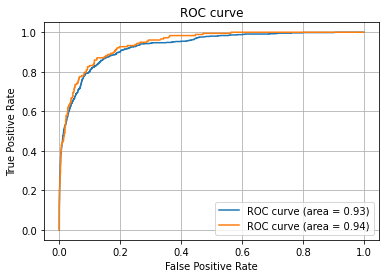

In [29]:
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))

# 決定木分析（比較）

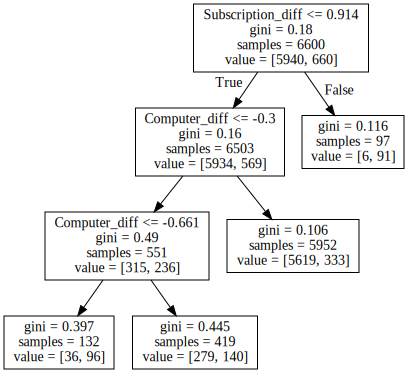

In [30]:
# モデルのインスタンスを生成する
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=4,random_state=1234)
clf.fit(X_train_rs, y_train_rs)

# モデルを可視化
Source(export_graphviz(clf, feature_names=columnList))

In [31]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.949182791658839


,predict(0),predict(1)
target(0),9918,68
target(1),473,187


In [32]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9470323065364388


,predict(0),predict(1)
target(0),2466,18
target(1),123,55


AUC(train): 0.7267037488848024
AUC(test): 0.7538188224863849
AUC ratio(train/test): 0.9640297206799022


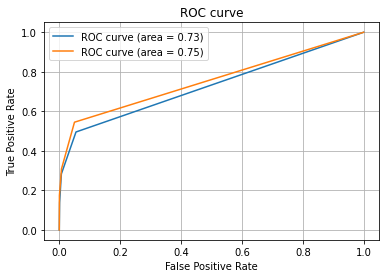

In [33]:
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))